In [69]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import os
import ast
import itertools
from collections import Counter
import scipy

In [57]:
def build_fig(size=(4, 4), dpi=200, axis_off=True):
    """A function to build a matplotlib figure. Primary
    goal is to sandardize the easy stuff.
    Args:
        - title (str): the title of the plot
        - axis_off (bool): should the axis be printed?
        - size (tuple): how big should the plot be?
        - y_lab (str): y axis label
        - x_lab (str): x axis label
    Returns:
        fig (plt.figure)
    """
    fig = plt.figure(figsize=size, 
                    facecolor='w',
                    dpi=dpi)

    if axis_off:
        plt.axis('off')
    return fig

In [24]:
DATA_DIR = 'demographic_data'

demographics = {}

for f in os.listdir(DATA_DIR):
    if 'Data_2015' in f:
        data_name = f.split("_")[0]
        tmp = pd.read_csv(f"{DATA_DIR}/{f}")
        tmp = tmp.iloc[1:].reset_index()
        tmp[['Census Tract', 'County', 'State']] = tmp['NAME'].str.split(',',expand=True)
        tmp['Census Tract'] = tmp['Census Tract'].str.replace("Census Tract", "").astype(float)
        tmp['GEOID'] = tmp['GEO_ID'].str.replace('1400000US', '').astype(int)
        print(f"{data_name} shape: {tmp.shape}")
        demographics[data_name] = tmp

print(demographics.keys())
print(demographics['Occupation'].columns)
demographics['Occupation'].head()

Occupation shape: (1416, 367)
Education shape: (1416, 775)
Income shape: (1416, 127)
dict_keys(['Occupation', 'Education', 'Income'])
Index(['index', 'GEO_ID', 'NAME', 'S2401_C01_001E', 'S2401_C01_001M',
       'S2401_C01_002E', 'S2401_C01_002M', 'S2401_C01_003E', 'S2401_C01_003M',
       'S2401_C01_004E',
       ...
       'S2401_C05_034E', 'S2401_C05_034M', 'S2401_C05_035E', 'S2401_C05_035M',
       'S2401_C05_036E', 'S2401_C05_036M', 'Census Tract', 'County', 'State',
       'GEOID'],
      dtype='object', length=367)


,index,GEO_ID,NAME,S2401_C01_001E,S2401_C01_001M,S2401_C01_002E,S2401_C01_002M,S2401_C01_003E,S2401_C01_003M,S2401_C01_004E,...,S2401_C05_034E,S2401_C05_034M,S2401_C05_035E,S2401_C05_035M,S2401_C05_036E,S2401_C05_036M,Census Tract,County,State,GEOID
0,1,1400000US26093710100,"Census Tract 7101, Livingston County, Michigan",1185,120,525,104,245,70,185,...,0.0,39.5,0.0,61.7,0.0,55.2,7101.0,Livingston County,Michigan,26093710100
1,2,1400000US26093710300,"Census Tract 7103, Livingston County, Michigan",2012,180,624,147,248,88,180,...,31.1,20.7,13.9,15.1,100.0,63.7,7103.0,Livingston County,Michigan,26093710300
2,3,1400000US26093710500,"Census Tract 7105, Livingston County, Michigan",835,87,384,81,190,75,136,...,40.5,26.3,0.0,32.2,0.0,56.6,7105.0,Livingston County,Michigan,26093710500
3,4,1400000US26093710700,"Census Tract 7107, Livingston County, Michigan",832,81,333,55,102,34,85,...,0.0,27.5,0.0,58.2,19.2,26.2,7107.0,Livingston County,Michigan,26093710700
4,5,1400000US26093711000,"Census Tract 7110, Livingston County, Michigan",2179,174,792,132,285,93,218,...,12.5,16.5,14.0,22.8,0.0,40.0,7110.0,Livingston County,Michigan,26093711000


In [26]:
tmp = demographics['Occupation']
tmp['County'].value_counts()

 Wayne County         611
 Oakland County       338
 Macomb County        217
 Washtenaw County     100
 Livingston County     61
 St. Clair County      50
 Monroe County         39
Name: County, dtype: int64

In [28]:
washt = tmp[tmp['County'] == ' Washtenaw County']
washt.head()

,index,GEO_ID,NAME,S2401_C01_001E,S2401_C01_001M,S2401_C01_002E,S2401_C01_002M,S2401_C01_003E,S2401_C01_003M,S2401_C01_004E,...,S2401_C05_034E,S2401_C05_034M,S2401_C05_035E,S2401_C05_035M,S2401_C05_036E,S2401_C05_036M,Census Tract,County,State,GEOID
705,706,1400000US26161400100,"Census Tract 4001, Washtenaw County, Michigan",867,148,574,143,100,50,81,...,100.0,40.6,-,**,-,**,4001.0,Washtenaw County,Michigan,26161400100
706,707,1400000US26161461000,"Census Tract 4610, Washtenaw County, Michigan",3374,253,1873,248,699,180,602,...,0.0,41.7,0.0,29.2,0.0,53.8,4610.0,Washtenaw County,Michigan,26161461000
707,708,1400000US26161464000,"Census Tract 4640, Washtenaw County, Michigan",2811,222,1216,210,660,210,514,...,38.0,34.1,0.0,50.4,28.8,44.8,4640.0,Washtenaw County,Michigan,26161464000
708,709,1400000US26161465000,"Census Tract 4650, Washtenaw County, Michigan",3063,208,1113,214,489,178,346,...,46.1,23.3,14.3,18.0,62.2,49.8,4650.0,Washtenaw County,Michigan,26161465000
709,710,1400000US26161466000,"Census Tract 4660, Washtenaw County, Michigan",1352,136,583,119,197,64,127,...,29.1,18.5,22.9,24.4,25.8,36.4,4660.0,Washtenaw County,Michigan,26161466000


In [31]:
df = pd.read_csv('CLEAN_DATA.csv')
print(df.shape)
print(df.columns)
df['TRACT'] = df['TRACT'].astype(int)
df['GEOID'] = df['GEOID'].astype(int)
df.head()

(5964, 40)
Index(['Unnamed: 0', 'file', 'county_x', 'labels', 'label_scores', 'colors',
       'color_pixel_fraction', 'color_scores', 'chunk', 'chunk_index',
       'image_index', 'latitiude', 'longitude', 'projection', 'resolution',
       'metadata', 'county_y', 'window_size', 'chunk_file', 'GEOID', 'CENTLAT',
       'AREAWATER', 'STATE', 'BASENAME', 'OID', 'LSADC', 'FUNCSTAT',
       'INTPTLAT', 'NAME', 'OBJECTID', 'TRACT', 'CENTLON', 'AREALAND',
       'INTPTLON', 'MTFCC', 'COUNTY', 'CENT', 'INTPT', 'Census_Benchmark',
       'Census_Vintage'],
      dtype='object')


,Unnamed: 0,file,county_x,labels,label_scores,colors,color_pixel_fraction,color_scores,chunk,chunk_index,...,TRACT,CENTLON,AREALAND,INTPTLON,MTFCC,COUNTY,CENT,INTPT,Census_Benchmark,Census_Vintage
0,0,/Volumes/Cooper_TB_Drive/research/readmissions...,Washtenaw,"['White', 'Black', 'Line']","[0.9736676812171936, 0.9484156370162964, 0.787...","[(255, 255, 255)]",[1.0],[1.0],1,0,...,732100,-84.083245,87423741,-84.074565,G5020,93,"(-84.0832452, 42.4668888)","(-84.074565, 42.4719749)",Public_AR_Current,ACS2015_Current
1,1,/Volumes/Cooper_TB_Drive/research/readmissions...,Washtenaw,"['White', 'Black', 'Line']","[0.9736676812171936, 0.9484156370162964, 0.787...","[(255, 255, 255)]",[1.0],[1.0],1,1,...,732100,-84.083245,87423741,-84.074565,G5020,93,"(-84.0832452, 42.4668888)","(-84.074565, 42.4719749)",Public_AR_Current,ACS2015_Current
2,2,/Volumes/Cooper_TB_Drive/research/readmissions...,Washtenaw,"['White', 'Black', 'Line']","[0.9736676812171936, 0.9484156370162964, 0.787...","[(255, 255, 255)]",[1.0],[1.0],1,10,...,732100,-84.083245,87423741,-84.074565,G5020,93,"(-84.0832452, 42.4668888)","(-84.074565, 42.4719749)",Public_AR_Current,ACS2015_Current
3,3,/Volumes/Cooper_TB_Drive/research/readmissions...,Washtenaw,"['White', 'Black', 'Line']","[0.9736676812171936, 0.9484156370162964, 0.787...","[(255, 255, 255)]",[1.0],[1.0],1,100,...,733601,-83.980353,30603912,-83.980535,G5020,93,"(-83.9803529, 42.4429685)","(-83.980535, 42.4443155)",Public_AR_Current,ACS2015_Current
4,4,/Volumes/Cooper_TB_Drive/research/readmissions...,Washtenaw,"['White', 'Black', 'Line']","[0.9736676812171936, 0.9484156370162964, 0.787...","[(255, 255, 255)]",[1.0],[1.0],1,101,...,733601,-83.980353,30603912,-83.980535,G5020,93,"(-83.9803529, 42.4429685)","(-83.980535, 42.4443155)",Public_AR_Current,ACS2015_Current


In [37]:
img_test = df[df['NAME'] == 'Census Tract 4450']
income_test = demographics['Income'][demographics['Income']['NAME'] == 'Census Tract 4450, Washtenaw County, Michigan']
# income_test.head()
# img_test.head()
print(img_test['GEOID'].value_counts())
print(income_test['GEOID'].value_counts())

26161445000    229
Name: GEOID, dtype: int64
26161445000    1
Name: GEOID, dtype: int64


In [39]:
occupation = demographics['Occupation']
income = demographics['Income']
education = demographics['Education']

occupation['GEOID'] = occupation['GEOID'].astype(str)
income['GEOID'] = income['GEOID'].astype(str)
education['GEOID'] = education['GEOID'].astype(str)

df['GEOID'] = df['GEOID'].astype(str)

merged = df.merge(income, how='left', on='GEOID')
merged.head()


,Unnamed: 0,file,county_x,labels,label_scores,colors,color_pixel_fraction,color_scores,chunk,chunk_index,...,S1903_C02_027M,S1903_C02_028E,S1903_C02_028M,S1903_C02_029E,S1903_C02_029M,S1903_C02_030E,S1903_C02_030M,Census Tract,County,State
0,0,/Volumes/Cooper_TB_Drive/research/readmissions...,Washtenaw,"['White', 'Black', 'Line']","[0.9736676812171936, 0.9484156370162964, 0.787...","[(255, 255, 255)]",[1.0],[1.0],1,0,...,(X),(X),(X),(X),(X),(X),(X),7321.00,Livingston County,Michigan
1,1,/Volumes/Cooper_TB_Drive/research/readmissions...,Washtenaw,"['White', 'Black', 'Line']","[0.9736676812171936, 0.9484156370162964, 0.787...","[(255, 255, 255)]",[1.0],[1.0],1,1,...,(X),(X),(X),(X),(X),(X),(X),7321.00,Livingston County,Michigan
2,2,/Volumes/Cooper_TB_Drive/research/readmissions...,Washtenaw,"['White', 'Black', 'Line']","[0.9736676812171936, 0.9484156370162964, 0.787...","[(255, 255, 255)]",[1.0],[1.0],1,10,...,(X),(X),(X),(X),(X),(X),(X),7321.00,Livingston County,Michigan
3,3,/Volumes/Cooper_TB_Drive/research/readmissions...,Washtenaw,"['White', 'Black', 'Line']","[0.9736676812171936, 0.9484156370162964, 0.787...","[(255, 255, 255)]",[1.0],[1.0],1,100,...,(X),(X),(X),(X),(X),(X),(X),7336.01,Livingston County,Michigan
4,4,/Volumes/Cooper_TB_Drive/research/readmissions...,Washtenaw,"['White', 'Black', 'Line']","[0.9736676812171936, 0.9484156370162964, 0.787...","[(255, 255, 255)]",[1.0],[1.0],1,101,...,(X),(X),(X),(X),(X),(X),(X),7336.01,Livingston County,Michigan


In [65]:
labels = merged['labels'].apply(ast.literal_eval).to_list()
labels = list(set(itertools.chain.from_iterable(labels)))
print(len(labels))
labels

326


['Marina',
 'Iron',
 'Track',
 'Water',
 'Automotive tire',
 'Junction',
 'Birch',
 'Line',
 'Soil',
 'Arcade',
 'Cottage',
 'Drawer',
 'Wine bottle',
 'Watercourse',
 'Skatepark',
 'Cap',
 'Drawing',
 'Holy places',
 'Table',
 'Terrain',
 'Textile',
 'Necklace',
 'Floor',
 'Rectangle',
 'Wood',
 'Beauty',
 'Adaptation',
 'Plane',
 'Canyon',
 'Beanie',
 'Cloud',
 'Asphalt',
 'Formation',
 'Symbol',
 'Bridge',
 'Plank',
 'Parking',
 'Suburb',
 'Lighting',
 'Landmark',
 'Plumbing fixture',
 'Shorts',
 'Fur',
 'Door',
 'Condominium',
 'Skyscraper',
 'Plan',
 'Portrait',
 'Circle',
 'Khaki',
 'Car',
 'Road',
 'Rug',
 'Mountain',
 'Ecoregion',
 'Slope',
 'Interior design',
 'National park',
 'Street light',
 'Thermokarst',
 'Stairs',
 'Paper',
 'Skull',
 'Abseiling',
 'Darkness',
 'Illustration',
 'Architecture',
 'Transport',
 'Tree',
 'Nonbuilding structure',
 'Bat',
 'Colubridae',
 'Canidae',
 'Footwear',
 'Picture frame',
 'Neck',
 'Obelisk',
 'Tile',
 'Viaduct',
 'Waterway',
 'Urban de

In [67]:
"""
how does median household income relate to dominant colors?

S1903_C02_001E
"""

cols = ['file', 'labels', 'label_scores', 'colors', 'color_pixel_fraction', 'color_scores',
        'latitiude', 'longitude', 'S1903_C02_001E']


# NOTE: we drop images for census tracts with a missing estimate

tmp = merged[cols].copy()
print(f"shape 1 {tmp.shape}")
tmp = tmp[tmp['S1903_C02_001E'] != "-"]
print(f"shape 2 {tmp.shape}")
tmp = tmp[tmp['S1903_C02_001E'] != "(X)"]
print(f"shape 3 {tmp.shape}")
tmp = tmp.rename(columns={'S1903_C02_001E': 'Median_Income'})
tmp['Median_Income'] = tmp['Median_Income'].astype(float)

max_income = tmp[tmp['Median_Income'] >= 100000]
print(f"Num images from max income tract: {max_income.shape}")
min_income = tmp[tmp['Median_Income'] < 100000]
print(f"Num images from min income tract: {min_income.shape}")

shape 1 (5964, 9)
shape 2 (5943, 9)
shape 3 (5939, 9)
Num images from max income tract: (1128, 9)
Num images from min income tract: (4496, 9)


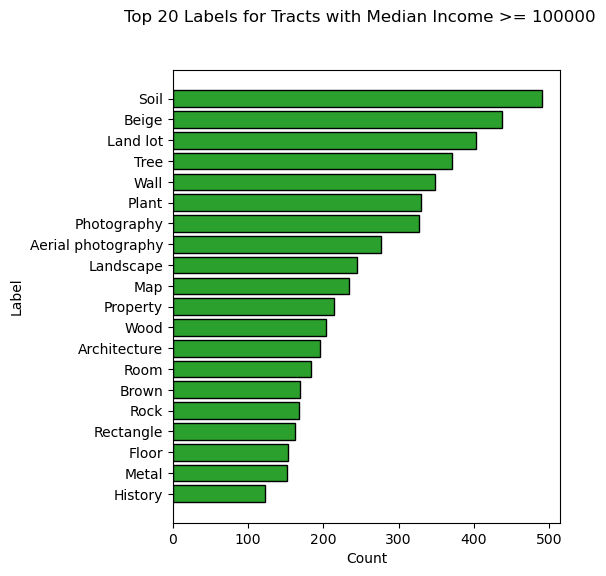

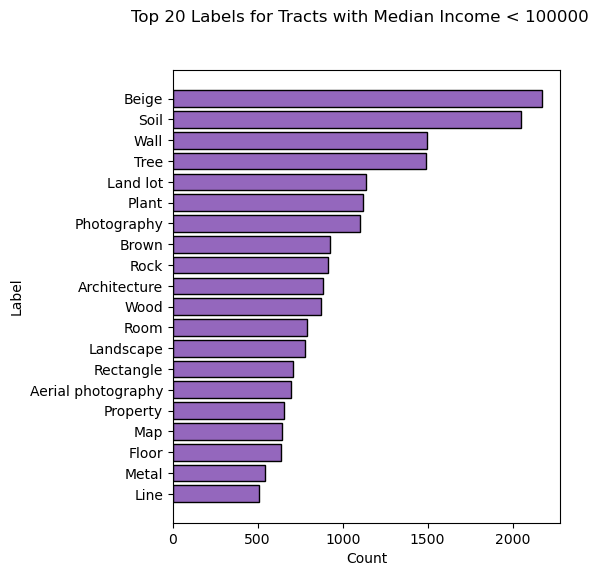

In [68]:
N_MOST_COMMON = 20
labels = max_income['labels'].apply(ast.literal_eval).to_list()
labels = list(itertools.chain.from_iterable(labels))
c = Counter(labels)
max_income_labels = pd.DataFrame(c.most_common(N_MOST_COMMON))
max_income_labels.columns = ['Label','Count']

fig = build_fig(size=(5, 6), dpi=100, axis_off=False)
plt.barh(y=max_income_labels['Label'], width=max_income_labels['Count'], color='C12', edgecolor='black')
plt.suptitle(f"Top {N_MOST_COMMON} Labels for Tracts with Median Income >= 100000")
plt.xlabel('Count')
plt.ylabel('Label')
plt.gca().invert_yaxis()

labels = min_income['labels'].apply(ast.literal_eval).to_list()
labels = list(itertools.chain.from_iterable(labels))
c = Counter(labels)
min_income_labels = pd.DataFrame(c.most_common(N_MOST_COMMON))
min_income_labels.columns = ['Label','Count']

fig = build_fig(size=(5, 6), dpi=100, axis_off=False)
plt.barh(y=min_income_labels['Label'], width=min_income_labels['Count'], color='C14', edgecolor='black')
plt.suptitle(f"Top {N_MOST_COMMON} Labels for Tracts with Median Income < 100000")
plt.xlabel('Count')
plt.ylabel('Label')
plt.gca().invert_yaxis()

In [72]:
# LABEL = 'Landscape'
# INCOME_LEVEL = 10000

# subset = tmp[tmp['labels'].str.contains(LABEL)]
# high = subset[subset['Median_Income'] >= INCOME_LEVEL]
# low = subset[subset['Median_Income'] < INCOME_LEVEL]

